<a href="https://colab.research.google.com/github/RubenMcCarty/Machine-Learning-with-Python/blob/master/11_ML_E2E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ML - Proyecto de ML de Principio a Fin
## [M.Sc. Ruben Quispe](https://www.linkedin.com/in/ruben-quispe-l/)

Llegamos al final de nuestro viaje aprendiendo sobre algoritmos y técnicas de *Machine Learning*. Hemos visto modelos tales como la regresión lineal, *Support Vector Machine* y árboles de decisión; técnicas de ensamblado como *Random Forest* y *Gradient Boosting* y otras técnicas como de reducción de dimensionalidad y *Clustering* para aprendizaje no supervisado. En este último post de la serie vamos a poner en práctica estos conceptos, y aprender algunos trucos nuevos por el camino, con la ejecución de un proyecto de ML de principio a fin para que puedas usarlo como "receta" para tus proyectos.

## El *checklist* del proyecto de *Machine Learning*

A la hora de llevar a cabo un proyecto de ML, estos son los puntos más importantes que tienes que tener en cuenta:

1. Entiende el problema desde una visión global (no sólo técnica, sino de negocio e impacto).
2. Obtén los datos.
3. Explora y visualiza los datos.
4. Prepara los datos para los algoritmos de ML.
5. Selecciona un modelo y entrénalo.
6. Ajusta tu modelo (optimización de hyperparámetros, ensamblado).
7. Presenta tu solución.
8. Despliega, monitoriza y mantén el sistema.

Obviamente, siéntete libre de modificar esta lista para ajustarla a tus necesidades.

## La visión global

A la hora de entender un problema de ML en su conjunto, estas son algunas de las preguntas que debes hacerte:

- ¿Cuáles son los objetivos de negocio?
- ¿Cómo será usada mi solución? (offline, API, aplicación, ...)
- ¿Existen soluciones similares o que se puedan usar para alcanzar los objetivos?
- ¿Cómo debería aproximar el problema? (aprendizaje supervisado/no supervisado, ...)
- ¿Cómo mediré la *performance*? (datos de test, métricas, ...)
- ¿Las métricas están alineadas con los objetivos de negocio?
- ¿Cuál es el valor mínimo de *performance* aceptable para alcanzar los objetivos de negocio?
- ¿Existe la experiencia para llevar a cabo el proyecto? (equipo interno, contratación externa, ...)
- ¿Cómo se podría resolver el problema de forma manual? (no automatizada, no ML)
- ¿Cuáles son las hipótesis hechas hasta ahora?

Si eres capaz de responder a estas preguntas, serás capaz de enfocar el problema de manera mucho más eficiente y proveer mejores resultados.

El ejemplo que vamos a desarrollar en este post consistirá en entrenar un modelo de ML para la predicción de precios de casas. Respondiendo a varias de las preguntas anteriores, el objetivo será el de desarrollar un sistema de ayuda a la decisión para inversión inmobiliaria. La solución será usada a través de API y aplicación web. Usaremos un dataset público con el que resolveremos una tarea de regresión de manera supervisada. La métrica usada será el error medico cuadrático evaluado en un conjunto de datos de test extraídos del dataset original. 

## Obtén los datos

Estos son los puntos esenciales a la hora de obtener los datos:

- Lista los datos disponibles y estima cuántos serán necesarios.
- Documenta cómo y dónde encontrar los datos.
- Comprueba cuánto espacio ocuparán los datos.
- Comprueba si existen limitaciones en el uso de los datos, obteniendo autorización si es necesario.
- Crea tu espacio de trabajo con suficiente espacio para almacenar los datos (ya sea en local o en la nube).
- Obtén los datos.
- Convierte los datos a un formato en el que puedas manipularlos fácilmente (sin cambiar los datos en sí, obviamente).
- Asegúrate de que cualquier información sensible es eliminada o protegida.
- Comprueba el tipo de los datos (series temporales, datos geográficos, ...)
- Genera tus datos de test, guárdalos y NUNCA los uses ni los mires.

Como nota, intenta automatizar el máximo número de puntos en el proceso para obtener nuevos datos de manera regular si es posible.

En nuestro ejemplo, vamos a descargar los datos de un repositorio público. El dataset es abierto para uso libre, por lo que no tenemos que preocuparnos por mucho más.

In [ ]:
import requests
import tarfile

URL = "https://mymldatasets.s3.eu-de.cloud-object-storage.appdomain.cloud/housing.tgz"
PATH = "housing.tgz"

def getData(url=URL, path=PATH):
  r = requests.get(url)
  with open(path, 'wb') as f:
    f.write(r.content)  
  housing_tgz = tarfile.open(path)
  housing_tgz.extractall()
  housing_tgz.close()

In [ ]:
getData()

In [ ]:
import pandas as pd

PATH = "housing.csv"

def loadData(path=PATH):
  return pd.read_csv(path)

In [ ]:
data = loadData()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8034,-118.13,33.84,48.0,1895.0,294.0,881.0,293.0,6.3364,307400.0,<1H OCEAN
16260,-121.25,37.97,41.0,855.0,189.0,716.0,206.0,2.0375,75000.0,INLAND
17188,-122.33,37.39,52.0,573.0,102.0,232.0,92.0,6.2263,500001.0,NEAR OCEAN
12864,-121.34,38.69,16.0,2686.0,516.0,1553.0,529.0,3.7857,112700.0,INLAND
468,-122.29,37.87,44.0,2539.0,755.0,1382.0,713.0,2.5370,175000.0,NEAR BAY
20199,-119.18,34.26,22.0,2334.0,359.0,1298.0,363.0,5.5275,228900.0,NEAR OCEAN
10422,-117.60,33.41,29.0,2193.0,389.0,922.0,387.0,4.5476,309200.0,NEAR OCEAN
7772,-118.10,33.91,35.0,1592.0,335.0,1238.0,320.0,4.9732,165000.0,<1H OCEAN
17689,-121.84,37.28,18.0,2749.0,633.0,1779.0,561.0,3.9250,166100.0,<1H OCEAN
15232,-117.21,33.02,26.0,3194.0,454.0,1032.0,406.0,10.1560,500001.0,NEAR OCEAN


Nuestro dataset ocupa unos 1.6MB de memoria, por lo que podemos almacenarlo sin problemas en nuestra máquina. Además, contiene información de tipo geográfico (latitud y longitud) con 8 características de tipo numérico y 1 de tipo categórico. Ahora, generaremos una muestra de test que sólo usaremos al final de todo para evaluar nuestro modelo.

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=22)

train.to_csv('housing_train.csv', index=False)
test.to_csv('housing_test.csv', index=False)

## Explora y Visualiza los datos

El siguiente paso en esta "receta" de desarrollo de un proyecto de ML es explorar y visualizar los datos. Para ello puedes seguir los siguientes pasos:

- Crea una copia del dataset para explorarlo (utiliza una pequeña muestra si es necedario).
- Crea un notebook para la exploración de los datos (lo que se conoce como *EDA*, o *exploratory data analysis* en inglés).
- Analiza cada atributo y sus características: nombre, tipo (categórico o numérico), cantidad de valores inexistentes (*missing values*), ruido en los datos, usabilidad para la tarea en cuestión, ...
- Para tareas de aprendizaje supervisado, identifica la característica objetivo, el *target* o *ground truth*. 
- Visualiza los datos.
- Estudia correlaciones entre características.
- Piensa en cómo resolverías el problema de manera manual (sin usar ML).
- Identifica posibles transformaciones que puedas aplicar a los datos para obtener mejores resultados.
- Investiga si existen datos adicionales que puedas usar (y vuelve al punto anterior).
- Documenta todos tus descubrimientos y lo que vayas aprendiendo.

Si tienes la posibilidad, contacta con experto en el campo para que te ayude y asesore durante este proceso.

Volviendo a nuestro ejemplo, vamos a explorar y visualizar los datos.

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [ ]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

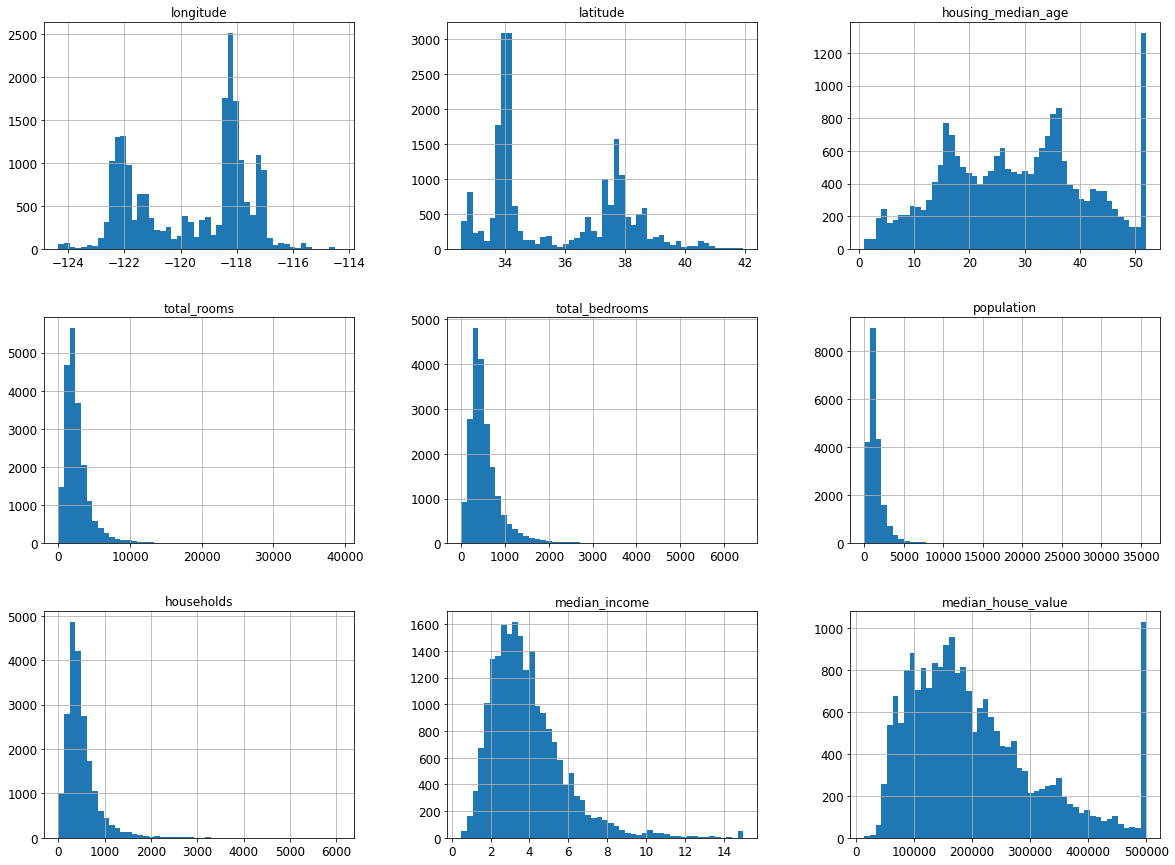

In [ ]:
data.hist(bins=50, figsize=(20,15))
plt.show()

La siguiente imagen muestra una visualización muy informativa para nuestro problema en particular. Aquí vemos todos los atributos del dataset usando la información geográfica en los ejes x-y como puntos cuyo tamaño depende de la población y el color representa el valor medio de una casa (nuestra variable objetivo).

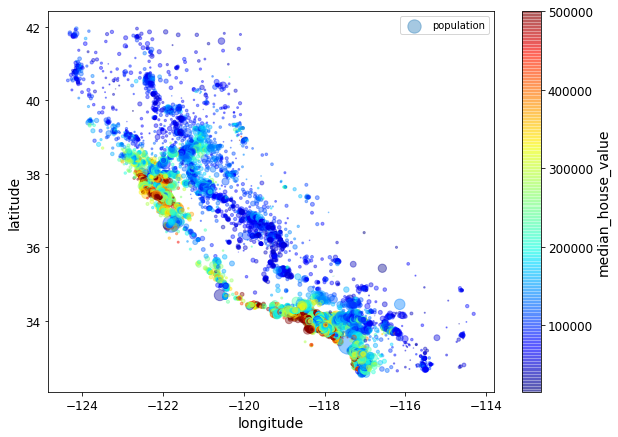

In [ ]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=data["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
plt.show()

Dependiendo de tus datos, intenta siempre encontrar aquellas visualizaciones que aporten el máximo de información posible. En nuestro caso, vemos que las casas más cara se encuentran derce de la costa, y que las casas más baratas se encuentran en el interior (los datos son de California).

Ahora vamos a buscar correlaciones entre los diferentes atributos.

In [ ]:
corr_matrix = data.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

Como podemos ver, la variable más correlacionada con el valor de una casa es el ingreso medio de la población, mientras que aspectos como el número de habitaciones o la población de la zona no son tan importantes.

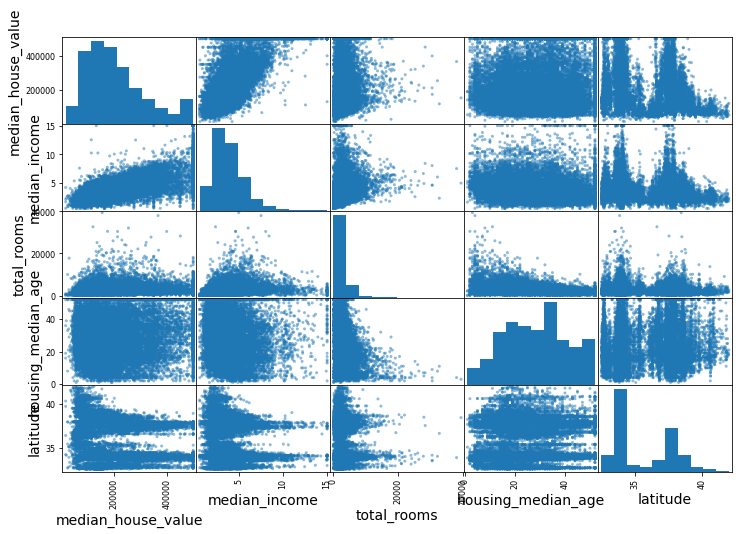

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age", "latitude"]
scatter_matrix(data[attributes], figsize=(12, 8))
plt.show()

## Prepara los datos

Una vez te hayas familiarizado con los datos y hayas descubierto cosas interesantes, deberás prepararlos para que los algoritmos de ML sean capaces de usarlos para entrenar. Para ello:

- Trabaja con copias del dataset, deja el original intacto.
- Implementa funciones para todas las transformaciones que apliques, de esta manera podrás aplicarlas a nuevos datos o en futuros proyectos.
- Limpia los datos elminando anomalías (*outliers*) y rellenando (o elminando) los valores que falten (*missing values*).
- Elige aquellos atributos con los que querrás trabajar y elimina el resto.
- *Feature Engineering*: separa las caracterísitcas en numéricas y categóricas, procesa los datos que sean necesarios (texto, fechas, ...), añade nuevas características, ...
- Normaliza los datos.

Empecemos separando las caracterísitcas para entrenar y el *target*.

In [ ]:
data = pd.read_csv('housing_train.csv')
data, labels = data.drop(['median_house_value'], axis=1), data['median_house_value'].copy()
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-119.72,36.76,23.0,6403.0,NaN,3573.0,1260.0,2.3006,INLAND
1,-120.79,38.70,13.0,5036.0,1034.0,2243.0,923.0,2.3319,INLAND
2,-118.20,34.04,18.0,796.0,227.0,547.0,218.0,1.0333,<1H OCEAN
3,-117.34,33.21,12.0,5963.0,1372.0,3015.0,1124.0,2.7386,NEAR OCEAN
4,-121.46,38.54,48.0,1001.0,205.0,605.0,175.0,1.8333,INLAND


In [ ]:
labels.head()

0     69000.0
1    138500.0
2    135400.0
3    216100.0
4     58200.0
Name: median_house_value, dtype: float64

Además, como las variables numéricas y categóricas las tendremos que tratar de manera diferente también las vamos a separar.

In [ ]:
data_num = data.drop(['ocean_proximity'], axis=1)
data_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-119.72,36.76,23.0,6403.0,NaN,3573.0,1260.0,2.3006
1,-120.79,38.70,13.0,5036.0,1034.0,2243.0,923.0,2.3319
2,-118.20,34.04,18.0,796.0,227.0,547.0,218.0,1.0333
3,-117.34,33.21,12.0,5963.0,1372.0,3015.0,1124.0,2.7386
4,-121.46,38.54,48.0,1001.0,205.0,605.0,175.0,1.8333


In [ ]:
data_cat = data[['ocean_proximity']]
data_cat.head()

,ocean_proximity
0,INLAND
1,INLAND
2,<1H OCEAN
3,NEAR OCEAN
4,INLAND


Como hemos visto en el primer punto, nuestro dataset contiene *missing values* en el atributo *total_bedrooms*. Si queremos usar esta caracterísitca para entrenar, deberemos tratar esto.

In [ ]:
data_num.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        163
population              0
households              0
median_income           0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer.fit(data_num)
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2126.    ,  435.    , 1165.    ,
        410.    ,    3.5334])

In [ ]:
X = imputer.transform(data_num)
data_tr = pd.DataFrame(X, columns=data_num.columns, index=data.index)
data_tr.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

Una vez tratados los *missing values*, podemos continuar tratando los datos categóricos ya que los modelos de ML solo son capaces de trabajar con datos numéricos. En este caso, haremos un *one-hot encoding*.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
data_cat_1hot = cat_encoder.fit_transform(data_cat)
data_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]])

Además, vamos a añadir un par de caracterísitcas nuevas que son prometedoras. Para ello podemos crear nuestro propia transformación de *Scikit-Learn*.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self  # nothing else to do
        
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [ ]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
data_extra_attribs = attr_adder.transform(data.values)
data_extra_attribs.shape # 9 + 2

(16512, 11)

El siguiente paso consiste en normalizar los datos numéricos, para lo que podemos usar un *StandardScaler*

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_num)
data_tr = pd.DataFrame(data_scaled, columns=data_num.columns, index=data.index)
data_tr.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.634900e+04,1.651200e+04,1.651200e+04,1.651200e+04
mean,7.623236e-16,6.937751e-16,6.444699e-17,3.953556e-18,-1.147640e-18,4.551632e-17,7.061938e-17,1.282216e-17
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000031e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-2.381604e+00,-1.445235e+00,-2.201136e+00,-1.214416e+00,-1.278351e+00,-1.256377e+00,-1.310671e+00,-1.764526e+00
25%,-1.105456e+00,-7.998537e-01,-8.491991e-01,-5.457575e-01,-5.776820e-01,-5.636872e-01,-5.758077e-01,-6.848289e-01
50%,5.324548e-01,-6.455233e-01,2.558386e-02,-2.329159e-01,-2.440301e-01,-2.270859e-01,-2.333984e-01,-1.765975e-01
75%,7.819462e-01,9.679302e-01,6.617896e-01,2.338048e-01,2.564478e-01,2.609859e-01,2.723138e-01,4.571083e-01
max,2.628182e+00,2.950841e+00,1.854675e+00,1.631534e+01,1.407917e+01,3.034782e+01,1.470618e+01,5.825810e+00


Si bien podemos ir aplicando todos los pasos de procesado uno por uno, lo mejor es juntarlo todo en una *Pipeline* que sea capaz de aceptar los datos tal y como vienen de leer el *csv* y los deje listos para ser usados por el modelo (aplicando todas las transformaciones anteriores).

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_attribs = list(data_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

data_prepared = full_pipeline.fit_transform(data)
data_prepared.shape # 8 numericas + 3 adicionales + 5 categoricas one hot encoded

(16512, 16)

## Selecciona y entrena un modelo

Una vez tenemos los datos listos, podemos entrenar un modelo de *ML*. Para ello te recomiendo que sigas los siguientes consejos:

- Prueba muchos modelos rápidos de diferentes tipos (lineales, SVM, random forest, ...) usando los hyperparámetros por defecto.
- Compara las métricas entre los modelos (usando *cross validation* si es posible).
- Analiza los errores de los diferentes modelos.
- Itera el proceso con diferentes combinaciones de caracterísiticas y *feature engineering*.
- Selecciona los modelos más prometedores (3-5), preferiblemente si cometen diferentes errores, para el siguiente paso.

En este paso puedes usar un pequeño subset de tus datos de entrenamiento para hacer muchas pruebas rápidas.

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(data_prepared, labels)

LinearRegression()

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, data_prepared, labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_rmse_scores)

Scores: [66437.86587554 67017.05947527 68432.15315087 72976.84720006
 71744.30539608 68479.63555331 69612.83771288 69513.25260389
 70670.12226447 66708.70099048]
Mean: 69159.27802228526
Standard deviation: 2070.2898903422633


In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(data_prepared, labels)

DecisionTreeRegressor(random_state=42)

In [ ]:
scores = cross_val_score(tree_reg, data_prepared, labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [68703.4303478  72987.81742712 71233.51615824 70066.66438864
 72373.81760126 68460.05433753 70375.70934853 70646.82923159
 72878.96434678 72629.31645032]
Mean: 71035.61196378153
Standard deviation: 1586.7249169822012


In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(data_prepared, labels)
forest_scores = cross_val_score(forest_reg, data_prepared, labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [45637.58713947 49631.22910104 50519.55905349 50609.95649911
 51309.02977016 50889.62631257 51532.353351   52301.92975819
 51709.06028876 48820.41504381]
Mean: 50296.074631759584
Standard deviation: 1827.4658318410761


Siéntete libre de probar tantos modelos como quieras, con diferentes combinaciones de atributos e hyperparámetros.

## Ajusta tu modelo

Una vez probados varios modelos puedes hacerte una idea de cual puede funcionar mejor para tu tipo de datos. Ahora, usando todos los datos disponibles, puedes continuar con la optimización de hyperparámetros (usando *cross validation* si es posible). Si puedes permitírtelo, puedes probar modelos ensamblados para obtener un extra de *performance* combinando tus mejores modelos. 

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True, n_jobs=-1)
grid_search.fit(data_prepared, labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63665.78629364774 {'max_features': 2, 'n_estimators': 3}
55306.96792983332 {'max_features': 2, 'n_estimators': 10}
52600.84680610766 {'max_features': 2, 'n_estimators': 30}
59101.51992683164 {'max_features': 4, 'n_estimators': 3}
52169.30264246198 {'max_features': 4, 'n_estimators': 10}
50129.76430891404 {'max_features': 4, 'n_estimators': 30}
59183.79980031041 {'max_features': 6, 'n_estimators': 3}
51895.62634200346 {'max_features': 6, 'n_estimators': 10}
50123.53914377234 {'max_features': 6, 'n_estimators': 30}
58509.63670843865 {'max_features': 8, 'n_estimators': 3}
52133.699413921495 {'max_features': 8, 'n_estimators': 10}
49993.671954016354 {'max_features': 8, 'n_estimators': 30}
62965.42237911761 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54490.029467187705 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58989.283381114365 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52452.74210883823 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3748293536048452, 'median_income'),
 (0.16387371587886645, 'INLAND'),
 (0.10502386905150324, 'pop_per_hhold'),
 (0.07093785404419045, 'longitude'),
 (0.06713446676533484, 'latitude'),
 (0.058129764559647905, 'rooms_per_hhold'),
 (0.04685501974832576, 'bedrooms_per_room'),
 (0.04163049058980691, 'housing_median_age'),
 (0.015354399111288572, 'population'),
 (0.01535234077318702, 'total_rooms'),
 (0.014657457859978879, 'total_bedrooms'),
 (0.014002265515751544, 'households'),
 (0.006015230402696976, '<1H OCEAN'),
 (0.003902856515528313, 'NEAR OCEAN'),
 (0.0021768791153720856, 'NEAR BAY'),
 (0.00012403646367597327, 'ISLAND')]

Por último, recuerda evaluar tu mejor modelo en los datos de test para obtener las ms finales.

In [ ]:
from sklearn.metrics import mean_squared_error

test_data = pd.read_csv('housing_test.csv')

final_model = grid_search.best_estimator_

X_test = test_data.drop("median_house_value", axis=1)
y_test = test_data["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse

48230.8525852065

In [ ]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([46125.79814736, 50247.79624482])

## Presenta tu solución

Ya has entrenado un buen modelo con tus datos, sin embargo el trabajo aún no ha terminado. Para presentar tu solución, debes:

- Documentar todo el trabajo que has llevado a cabo.
- Crear una presentación con visualizaciones llamativas e informativas que reflejen la visión global y transmitan las conclusiones principales.
- Explicar tu solución y porque has logrado el objetivo de negocio.
- Describe lo que has aprendido en el proceso, las cosas que han funcionado y las que no, las hipótesis que has asumido y las limitaciones del sistema.
- Utiliza frases fáciles de recordar para comunicar los resultados de tu trabajo (por ejemplo, el indicador número uno para predecir el precio de una casa es el ingreso medio de la zona).
- ¿Es tu solución mejor que la usada actualmente (*baseline*)?

## Despliega, monitoriza y mantén el sistema

Guarda tus modelos para poder desplegarlos en el entorno de producción elegido (servidor web, aplicación movil, ...). Una vez en marcha, deberás monitorizar el sistema para asegurarte que todo funciona según lo esperado. Si tu aplicación lo permite, recoge datos nuevos del entorno de producción a partir del uso real, anótala (si tu tarea es supervisada) y añádelos a tu dataset (en nuevas versiones) para re-entrenar el modelo de manera periódica. Además, deberás monitorizar aspectos como el *data drift* para evitar que tu modelo se degrade y poder revertir a modelos anteriores si algo se rompe. Si tiene más interés sobre estos aspectos te recomiendo la serie de posts sobre *MLOps* de mi blog.

In [ ]:
import joblib

joblib.dump(final_model, "my_model.pkl")
joblib.dump(full_pipeline, "my_pipeline.pkl")

['my_pipeline.pkl']

In [ ]:
model = joblib.load("my_model.pkl")
pipeline = joblib.load("my_pipeline.pkl")

In [ ]:
data_test = sample = pd.read_csv("housing_test.csv")

In [ ]:
sample = data_test.sample(3)
sample

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2785,-121.73,36.93,29.0,2931.0,535.0,1954.0,506.0,3.2917,224700.0,<1H OCEAN
3619,-117.33,33.87,14.0,2300.0,335.0,1001.0,311.0,5.1045,161300.0,INLAND
1243,-122.31,38.01,18.0,4123.0,874.0,1895.0,772.0,3.2759,195000.0,NEAR BAY


In [ ]:
X_test_prepared = pipeline.transform(sample)
final_predictions = model.predict(X_test_prepared)
final_predictions

array([179200.        , 194756.66666667, 153346.66666667])